In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway # ANOVA Analysis
from scipy.stats import ttest_ind # Conducting a t-test
from scipy.stats import chi2_contingency # Statistical model for performing a chi-square analysis   

In [183]:
df = pd.read_csv("loan_approval_dataset.csv")

In [184]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [186]:
df.shape

(4269, 13)

In [187]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [188]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4264    False
4265    False
4266    False
4267    False
4268    False
Length: 4269, dtype: bool

In [189]:
df.duplicated(keep=False).sum()

0

In [190]:
df[" residential_assets_value"] = df[" residential_assets_value"].abs()

# count if there are negative values left

(df[" residential_assets_value"] < 0).sum()

0

In [191]:
# Remove white spaces from column names
df.columns = df.columns.str.strip()

# Remove the white spaces from values in the dataframe
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [193]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [194]:
# Adding CIBIL Rating column with values (Poor, Average, Good, Excellent)

def cibil_score(value):
    if 300 <= value <= 549:
        return "Poor"
    elif 550 <= value <= 649:
        return "Average"    
    elif 650 <= value <= 749:
        return "Good"
    elif 750 <= value <= 900:
        return "Excellent" 
    else:
        return "Error"

df["cibil ratings"] = df["cibil_score"].apply(cibil_rating)

df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor


In [195]:
# Grouping customers according to incomes

def income_levels(values):
    if 100000 <= values <= 1000000:
         return "Low"
    elif 1000001 <= values <= 4000000:
         return "Middle"   
    elif 4000001 <= values <= 7500000:
         return "Low Middle"
    elif 7500000 <= values <= 10000000:
         return "High"
    else: 
        return "Very High Income"

df["Income_levels"] = df["income_annum"].apply(income_levels)

df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High


In [196]:
# Grouping loan amounts as Bronze, Silver, Gold, Platinum 

def loan_rating(values):
    if 100000 <= values <= 10000000:
        return "Bronze"
    elif 10000000 <= values <= 20000000:
        return "Sliver"
    elif 20000001 <= values <= 30000000:
        return "Gold"
    elif 30000001 <= values <= 40000000:
        return "Platinum"
    else:
        return "Unknown"

df["Loan_rating"] = df["loan_amount"].apply(loan_rating)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels,Loan_rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle,Sliver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold


In [197]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels,Loan_rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle,Sliver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold


In [198]:
# Grouping Loan terms as either short-term, long-term or intermediate

def long_term_range(value):
    if 0 <= value <= 7:
        return "Short-Term"
    elif 8 <= value <= 14:
        return "Intermediate"
    elif 15 <= value <= 20:
        return "Long-Term"
    else: 
        return "Unknown"


df["Long_term_type"] = df["loan_term"].apply(long_term_range)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels,Loan_rating,Long_term_type
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle,Sliver,Intermediate
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term


In [199]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels,Loan_rating,Long_term_type
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle,Sliver,Intermediate
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term


In [200]:
# Grouping number of dependents as low. Moderate, High

def dependents_class(values):
    if 0 <= values <= 1:
        return "Low" 
    elif 2 <= values <= 3:
        return "Moderate"
    elif 4 <= values <= 5:
        return "High"
    else:
        return "Unknown"

df["Dependents_levels"] = df["no_of_dependents"].apply(dependents_class)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels,Loan_rating,Long_term_type,Dependents_levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle,Sliver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


# Number of Applicants in each Income Level

In [201]:
# Grouping customers according to income levels

income = df["Income_levels"].value_counts().reset_index()

income = income.rename(columns = {"Income_levels": "Income Levels", "count": "Number of Applicants"})

income

,Income Levels,Number of Applicants
0,Low Middle,1548
1,Middle,1284
2,High,1047
3,Low,390


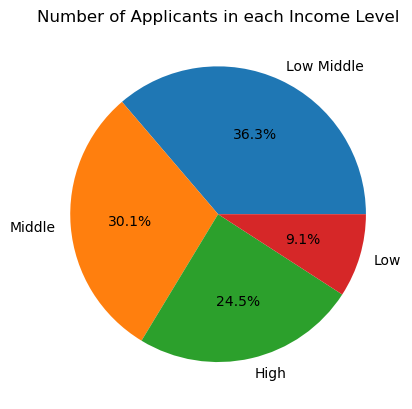

In [202]:
plt.pie(income["Number of Applicants"], labels = income["Income Levels"], autopct = "%1.1f%%")
plt.title("Number of Applicants in each Income Level")
plt.show()

# Segment according to number of dependents

In [203]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels,Loan_rating,Long_term_type,Dependents_levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle,Sliver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [204]:
dependents = df["Dependents_levels"].value_counts().reset_index()

dependents = dependents.rename(columns = {"Dependents_levels": "Dependents Levels", "count": "Number of Applicants"}) 

dependents

,Dependents Levels,Number of Applicants
0,Moderate,1435
1,High,1425
2,Low,1409


# Segment according to Education

In [205]:
education = df["education"].value_counts().reset_index()

education = education.rename(columns = {"education": "Education", "count": "Number of Applicants"})

education

,Education,Number of Applicants
0,Graduate,2144
1,Not Graduate,2125


# Segment according to Employment

In [206]:
employment = df["self_employed"].value_counts().reset_index()	

employent = employment.rename(columns = {"self_employed": "Self Employed", "count": "Number of Applicants"})

employent

,Self Employed,Number of Applicants
0,Yes,2150
1,No,2119


# Rate of Loan Approved

In [207]:
loans = df["loan_status"].value_counts().reset_index()

loans = loans.rename(columns = {"loan_status": "Loan Status", "count": "Total"}) 

loans

,Loan Status,Total
0,Approved,2656
1,Rejected,1613


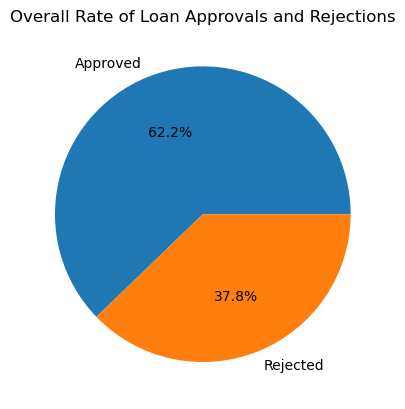

In [208]:
plt.pie(loans["Total"], labels = loans["Loan Status"], autopct = "%1.1f%%")
plt.title("Overall Rate of Loan Approvals and Rejections")
plt.show()

# Loan approvals according to level of education 

In [209]:
# Grouping data by education and loan status

education = df.groupby(["education", "loan_status"]).size().reset_index()

# Filter to include approved and rejected
education = education[education["loan_status"].isin(["Approved", "Rejected"])]

education

,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


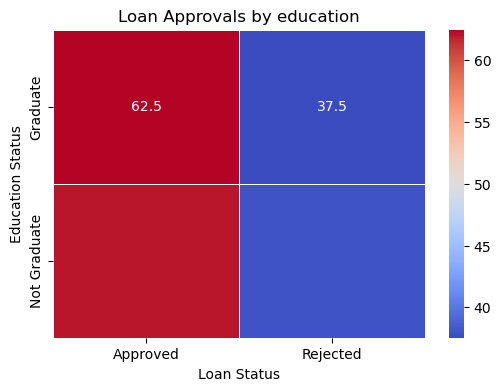

In [210]:
# Pivot table
pivot_table = education.pivot(index="education", columns="loan_status", values=0)
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals, axis=0) * 100

# Create a heatmap 
plt.figure(figsize = (6, 4))
sns.heatmap(percentage, annot = True, fmt=".1f", cmap="coolwarm", linewidth=0.5)

# Labeling the heatmap
plt.title("Loan Approvals by education") 
plt.xlabel("Loan Status")
plt.ylabel("Education Status")
plt.show()

## Loan Approval Rate by CIBIL Rating



### The influence of CIBIL rating on loan approvals

In [211]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels,Loan_rating,Long_term_type,Dependents_levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle,Sliver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [212]:
# Grouping data accordeing to CIBIL rating and loans status and count For each combination

cibil_rates = df.groupby(["cibil ratings", "loan_status"]).size().reset_index()
cibil_rates = cibil_rates.rename(columns = {0: "Total"})

cibil_rates

,cibil ratings,loan_status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


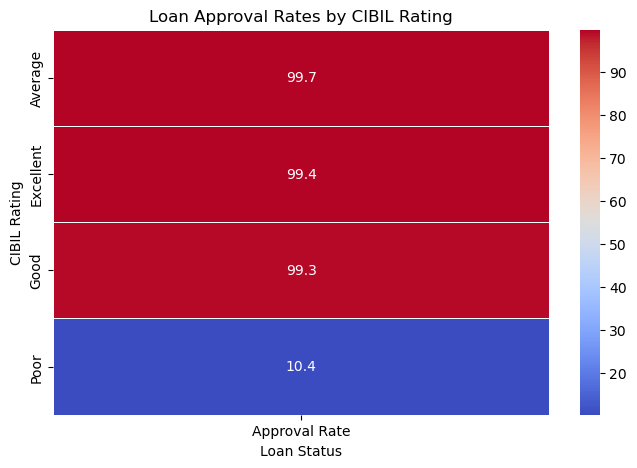

In [213]:
# Pivot table
pivot_table = cibil_rates.pivot_table(index="cibil ratings", columns="loan_status", values="Total")

# Calculating the approval rates
pivot_table["Approval Rate"] =pivot_table["Approved"] / (pivot_table["Approved"] + pivot_table["Rejected"]) * 100

# Create a heatmapcompile
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table[["Approval Rate"]], annot = True, fmt=".1f", cmap="coolwarm", linewidth=0.5)

plt.title("Loan Approval Rates by CIBIL Rating")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Rating")
plt.show()


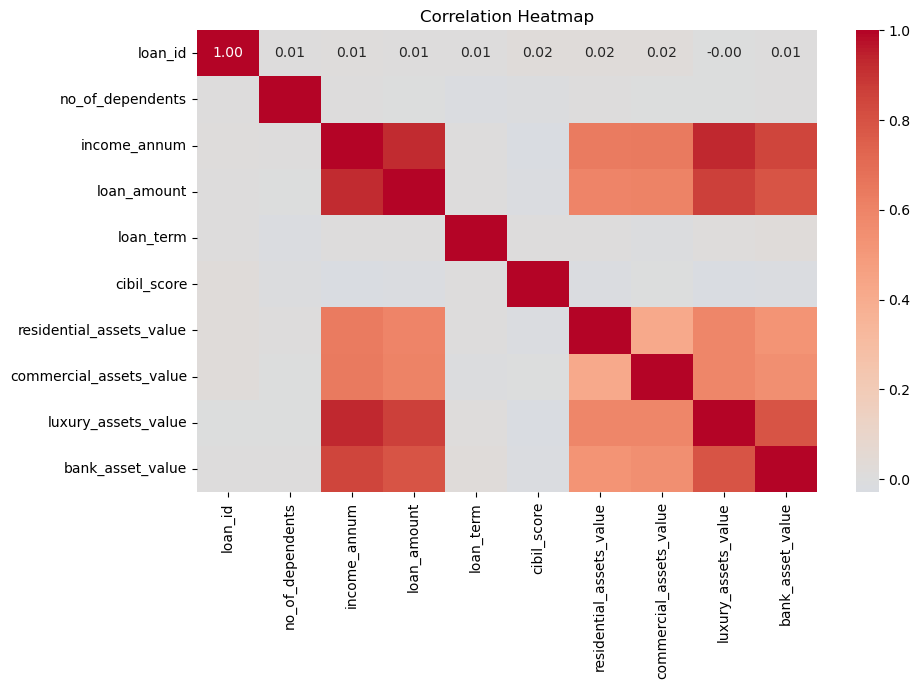

In [214]:
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [215]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels,Loan_rating,Long_term_type,Dependents_levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle,Sliver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


In [216]:
# Correlation between asset value and income
assets = ["residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]
income = "income_annum"

# Calculate the correlation (Pearson correlation)
correlations = df[assets + [income]].corr() 

correlations

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000


In [217]:
# Correlation between asset value and loan
assets = ["residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]
loan = "loan_amount"

# Calculate the correlation (Pearson correlation)
correlations = df[assets + [loan]].corr() 

correlations

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.594582
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.603188
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.860914
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.788122
loan_amount,0.594582,0.603188,0.860914,0.788122,1.000000


# Asset value impact/influence on loan approval/eligibility

### if there is a relation between assets values and getting a loan approval

In [218]:
# Splitting data into two groups based on loan status

approved = df[df["loan_status"] == "Approved"]
rejected = df[df["loan_status"] == "Approved"]

# performed a t-test
assets = ["residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]

for columns in assets:
    t_stat, p_value = ttest_ind(approved[columns], rejected[columns], equal_var=False)
    print(f"T-Test for {columns}:")
    print(f" T-Statistic: {t_stat}")
    print(f" P-Value: {p_value}")
    if p_value < 0.05: # 95% confidence level
        print(f" The difference in {columns} between approved and rejected loans statistically significant")
    else:
        print(f" The difference in {columns} between approved and rejected loans is not statistically significant")

T-Test for residential_assets_value:
 T-Statistic: 0.0
 P-Value: 1.0
 The difference in residential_assets_value between approved and rejected loans is not statistically significant
T-Test for commercial_assets_value:
 T-Statistic: 0.0
 P-Value: 1.0
 The difference in commercial_assets_value between approved and rejected loans is not statistically significant
T-Test for luxury_assets_value:
 T-Statistic: 0.0
 P-Value: 1.0
 The difference in luxury_assets_value between approved and rejected loans is not statistically significant
T-Test for bank_asset_value:
 T-Statistic: 0.0
 P-Value: 1.0
 The difference in bank_asset_value between approved and rejected loans is not statistically significant


In [219]:
# Using hypothesis: there is no relation (significant difference) between assets value and income
# alternative hypothesis: There exists a relationship (significant difference) between asset value and income

# Extracting values in columns
residential_assets = df["residential_assets_value"]
commercial_assets = df["commercial_assets_value"]
luxury_assets = df["luxury_assets_value"]
bank_assets = df["bank_asset_value"]
income = df["income_annum"]

# perform ANOVA
f_statistic, p_value = f_oneway(residential_assets, commercial_assets, luxury_assets, income)

print("The f statisticis:", f_statistic)
print("The p value is:", p_value)

# Interpretation of the results
if p_value < 0.05:
    print("The is a significant influence of income on asset value")
else:
    print("There is no significant influence of income on assets values")

The f statisticis: 2570.283427125102
The p value is: 0.0
The is a significant influence of income on asset value


# Correlation between income and loan amount

In [220]:
income = df["income_annum"]
loan = df["loan_amount"]

# perform an independent t-test
t_stat, p_value = ttest_ind(income, loan, equal_var=True)

print("The T-statistic:", t_stat)
print("The p value is:", p_value)

if p_value < 0.05:
    print("There is a statistical significant difference in loan amount and income per annum")
else:
    print("There is no statistical significant difference in loan amount and income per annum")

The T-statistic: -69.51489699866843
The p value is: 0.0
There is a statistical significant difference in loan amount and income per annum


#### Box plot to represent Correlation between income and loan amount

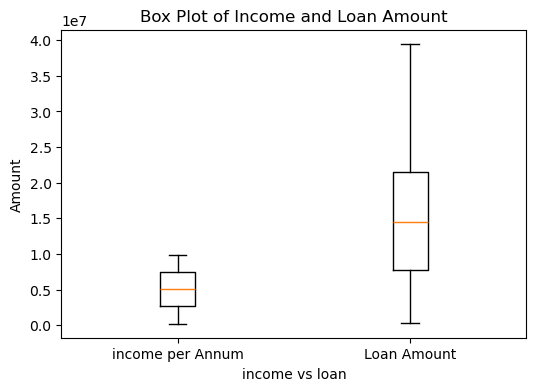

In [221]:
income = df["income_annum"]
loan = df["loan_amount"]

# Create the figure
plt.figure(figsize=(6,4))

# plotting the box plots  
plt.boxplot([income, loan], labels= ["income per Annum", "Loan Amount"])

# Charts labels
plt.xlabel("income vs loan")
plt.ylabel("Amount")
plt.title("Box Plot of Income and Loan Amount")
plt.show()                                    

# Chi-Square analysis: Determine correlation between loan status and number of dependents 

In [222]:
# Creating a contingency table
contingency_table = pd.crosstab(df["loan_status"], df["Dependents_levels"])

# perform chi-square
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("The P-value is:", p_value)
print("The dof is:", dof)

# Set the significant level
alpha = 0.05

if p_value < alpha:
    print("There is a statistical significant difference in loan status and number of dependents")
else:
    print("There is no statistical significant difference in loan status and number of dependents")

Chi-square test statistic: 1.1296798036848839
The P-value is: 0.5684511474541935
The dof is: 2
There is no statistical significant difference in loan status and number of dependents


In [223]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels,Loan_rating,Long_term_type,Dependents_levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle,Sliver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


# Logistic Regression

In [224]:
def edu_status(status):
    if status == "Graduate":
        return 1
    elif status == "Not Graduate":
        return 0
    else:
        return "Unknown"

df["edu status"] = df["education"].apply(edu_status)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels,Loan_rating,Long_term_type,Dependents_levels,edu status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle,Sliver,Intermediate,Low,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate,1
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,1
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High,0


In [233]:
def loan_approval(status):
    if status == "Approved":
        return 1
    elif status == "Rejected":
        return 0
    else:
        return "Unknown"

df["Loan Approval"] = df["loan_status"].apply(loan_approval)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil ratings,Income_levels,Loan_rating,Long_term_type,Dependents_levels,edu status,Loan Approval
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,1,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Low Middle,Sliver,Intermediate,Low,0,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate,1,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,1,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High,0,0


In [239]:
# Seperate x-axis values 
X = df.drop(columns = {"loan_id", "cibil ratings", "Income_levels",	"Loan_rating", "Dependents_levels", "loan_status", "Long_term_type", "Loan Approval",
                      "education", "self_employed"})

X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [240]:
# Defining the y-axis
y = df["Loan Approval"]

y.head()

0    1
1    0
2    0
3    0
4    0
Name: Loan Approval, dtype: int64

# Importing the regression model modules

In [237]:
# importing logistic regression modules

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [241]:
# Split data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [242]:
X_train

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu status
4084,0,9300000,29400000,10,351,24200000,6800000,35800000,6100000,0
3556,5,5200000,20700000,2,538,3200000,2000000,14600000,3600000,1
2323,1,1900000,4500000,12,742,1200000,2000000,4400000,1200000,0
740,3,4100000,15900000,12,538,3900000,800000,8800000,5700000,0
1215,5,9600000,38000000,10,359,2100000,13600000,38200000,9400000,1
...,...,...,...,...,...,...,...,...,...,...
1646,0,5900000,20300000,4,806,300000,3700000,16400000,4800000,0
840,4,3500000,8900000,4,478,4000000,3900000,11300000,3800000,1
1144,1,8400000,24600000,14,817,1800000,13100000,31300000,8200000,0
48,3,5500000,20500000,12,634,800000,8600000,18500000,8200000,0


In [243]:
X_test

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu status
3133,4,700000,2300000,16,688,1500000,300000,1900000,400000,1
4053,1,7000000,20300000,14,837,7700000,2200000,19700000,5500000,0
610,3,8100000,23900000,10,449,7100000,6100000,28300000,8900000,1
3177,3,4900000,13100000,18,401,5700000,4100000,16400000,3600000,1
607,0,6000000,13100000,6,385,16600000,7600000,22000000,7400000,0
...,...,...,...,...,...,...,...,...,...,...
885,2,5200000,13500000,2,777,7000000,5200000,15500000,6100000,1
804,2,800000,2100000,6,726,2000000,0,2600000,600000,0
4180,3,9700000,30800000,18,471,12700000,3800000,37300000,10400000,0
1078,5,9800000,37900000,18,301,6700000,4900000,34300000,6200000,0


# Scaling our data

In [244]:
scaler = StandardScaler()

In [254]:
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [255]:
X_train_scaled

array([[-1.46148376,  1.48642509,  1.54664878, ...,  2.24569177,
         0.32060948, -1.00268097],
       [ 1.47642896,  0.02091063,  0.58652234, ..., -0.08829609,
        -0.44959563,  0.9973262 ],
       [-0.87390121, -1.15864979, -1.20129933, ..., -1.2112525 ,
        -1.18899253, -1.00268097],
       ...,
       [-0.87390121,  1.16472679,  1.01692385, ...,  1.75026982,
         0.96758177, -1.00268097],
       [ 0.30126387,  0.12814339,  0.56445046, ...,  0.3410696 ,
         0.96758177, -1.00268097],
       [-0.87390121,  1.5579136 ,  0.50927078, ...,  2.23468239,
         0.35141768, -1.00268097]])

In [256]:
X_test_scaled

array([[ 0.88884642, -1.58758085, -1.44408992, ..., -1.48648692,
        -1.43545817,  0.9973262 ],
       [-0.87390121,  0.66430722,  0.54237859, ...,  0.47318212,
         0.13576025, -1.00268097],
       [ 0.30126387,  1.05749403,  0.93967229, ...,  1.41998852,
         1.1832392 ,  0.9973262 ],
       ...,
       [ 0.30126387,  1.62940211,  1.70115189, ...,  2.41083242,
         1.64536226, -1.00268097],
       [ 1.47642896,  1.66514636,  2.48470336, ...,  2.08055112,
         0.35141768, -1.00268097],
       [-0.28631867, -0.01483363,  0.15612082, ...,  0.18693833,
        -0.20313   , -1.00268097]])

In [257]:
# Training the model
log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [263]:
# Predict
log_reg.predict(X_train_scaled)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [264]:
# Accuracy
log_reg.score(X_train_scaled, y_train)

0.9183400267737617

In [265]:
# Application of model to new dataset
log_reg.score(X_test_scaled, y_test)

0.9141295862607338